# K-Nearest Neighbors algorithm

Фильтр на предупреждения.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

## Подготовка данных

Импорт библиотек для работы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

Считываем данные из датасета **"Ionosphere"** про радиолокационные данные, собранные системой в Гусином заливе, которая состоит из фазированной решетки из 16 высокочастотных антенн с общей передаваемой мощностью порядка 6,4 киловатт. Мишенями были свободные электроны в ионосфере. "Хорошие" радиолокационные сигналы - это те, которые показывают признаки какого-либо типа структуры в ионосфере. "Плохие" - это те, которые этого не делают; их сигналы проходят через ионосферу.  
Принятые сигналы обрабатывались с использованием автокорреляционной функции, аргументами которой являются время импульса и номер импульса. Для системы Goose Bay было 17 номеров импульсов. Экземпляры в этой базе данных описываются 2 атрибутами на номер импульса, соответствующими комплексным значениям, возвращаемым функцией в результате комплексного электромагнитного сигнала.

In [3]:
df = pd.read_excel('ionosphere.xlsx')
df.head(5)

,attb1,attb2,attb3,attb4,attb5,attb6,attb7,attb8,attb9,attb10,...,attb26,attb27,attb28,attb29,attb30,attb31,attb32,attb33,attb34,target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Проверим типы входных данных.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   attb1   351 non-null    int64  
 1   attb2   351 non-null    int64  
 2   attb3   351 non-null    float64
 3   attb4   351 non-null    float64
 4   attb5   351 non-null    float64
 5   attb6   351 non-null    float64
 6   attb7   351 non-null    float64
 7   attb8   351 non-null    float64
 8   attb9   351 non-null    float64
 9   attb10  351 non-null    float64
 10  attb11  351 non-null    float64
 11  attb12  351 non-null    float64
 12  attb13  351 non-null    float64
 13  attb14  351 non-null    float64
 14  attb15  351 non-null    float64
 15  attb16  351 non-null    float64
 16  attb17  351 non-null    float64
 17  attb18  351 non-null    float64
 18  attb19  351 non-null    float64
 19  attb20  351 non-null    float64
 20  attb21  351 non-null    float64
 21  attb22  351 non-null    float64
 22  at

Статистическое описание входных данных.

In [5]:
df.describe()

,attb1,attb2,attb3,attb4,attb5,attb6,attb7,attb8,attb9,attb10,...,attb25,attb26,attb27,attb28,attb29,attb30,attb31,attb32,attb33,attb34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Данные были преодбработаны заранее, в них отсутствкют пропуски, значения отмасштабированы от -1 до 1.

Посмотрим на соотношение классов радиолокационных данных.

In [6]:
df['target'].value_counts()

target
g    225
b    126
Name: count, dtype: int64

# Метод K-ближайших соседей

**К-ближайших соседей** (K-Nearest Neighbors или просто KNN) — алгоритм классификации и регрессии, основанный на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу.

Принцип работы KNN алгоритма строится следующим образом:

1) сначала вычисляется расстояние между тестовым и всеми обучающими образцами;

2) далее из них выбирается k-ближайших образцов (соседей), где число k задаётся заранее;

3) итоговым прогнозом среди выбранных k-ближайших образцов будет мода в случае классификации и среднее арифметическое в случае регрессии;

4) предыдущие шаги повторяются для всех тестовых образцов.

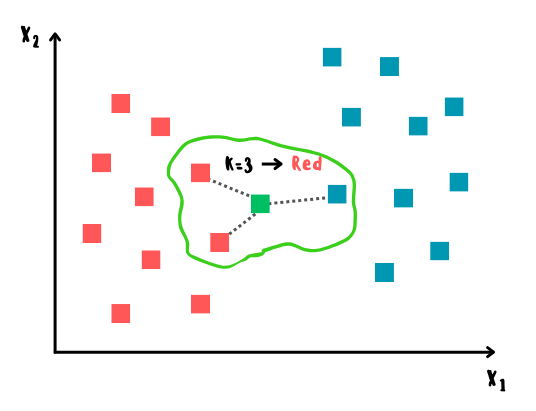

Разделим данные на признаковое поле и целевое.

In [7]:
X = df.drop(['target'], axis=1)
y = df['target']

Разделим данные на обучающую и тестовую выборку в соотношении 70/30 соответственно.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

Метод для преобразования категориальных таргетных признаков в числа:

In [9]:
def convert_to_int(data):
    result = []
    for d in data:
        if d == 'g':
            result.append(1)
        else:
            result.append(0)
    return result

## Автоматический алгоритм

Библиотека автоматически подберет алгоритм, исходя из входных данных. 

Примечание: подгонка по разреженным входным данным переопределит установку этого параметра с использованием brute-force.

Построим модель с дефолтными параметрами.

In [10]:
# Объявляем модель
knn = KNeighborsClassifier(algorithm='auto')
# Обучаем
knn.fit(X_train, y_train)
# Прогнозируем
y_pred = knn.predict(X_test)

Посчитаем для нее точность:

In [11]:
print(accuracy_score(y_test, y_pred))

0.8584905660377359


Настроим сетку для поиска наилучших параметров для модели с **количеством соседей** от 1 до 30 и разными метриками расстоярния.

In [12]:
parameters = {
    'n_neighbors': range(1, 31, 1),
    'metric': ['minkowski', 'sqeuclidean', 'seuclidean', 'mahalanobis',
               'jensenshannon', 'euclidean', 'cosine', 'correlation',
               'cityblock', 'chebyshev', 'canberra', 'braycurtis']
              }

Найдем самые оптимальные параметры модели:

In [13]:
# Объявляем модель
knn = KNeighborsClassifier(algorithm='auto')
# Объявляем сетку для поиска наилучших параметров
clf = GridSearchCV(knn, parameters)
# Обучаем модель
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'sqeuclidean', 'seuclidean',
                                    'mahalanobis', 'jensenshannon', 'euclidean',
                                    'cosine', 'correlation', 'cityblock',
                                    'chebyshev', 'canberra', 'braycurtis'],
                         'n_neighbors': range(1, 31)})

Выведем лучшие параметры:

In [14]:
print(clf.best_estimator_)

KNeighborsClassifier(metric='braycurtis', n_neighbors=2)


Обучим модель на основе лучших параметров:

In [15]:
# Объявляем модель
knn_auto = KNeighborsClassifier(algorithm='auto', metric='braycurtis', n_neighbors=2)
# Объявляем сетку для поиска наилучших параметров
knn_auto.fit(X_train, y_train)
# Прогнозируем
y_pred_auto = knn_auto.predict(X_test)

Выведем меру точности для обучающих данных:

In [16]:
accuracy_auto_train = accuracy_score(y_train, knn_auto.predict(X_train))
accuracy_auto_train

1.0

Выведем меру точности для тестовых данных:

In [17]:
accuracy_auto = accuracy_score(y_test, y_pred_auto)
accuracy_auto

0.9339622641509434

Разница между моделями:

In [18]:
abs(accuracy_auto_train-accuracy_auto)

0.06603773584905659

Выведем значения полноты, точности и ф-меры:

In [19]:
print(classification_report(y_test, y_pred_auto))

              precision    recall  f1-score   support

           b       0.92      0.90      0.91        39
           g       0.94      0.96      0.95        67

    accuracy                           0.93       106
   macro avg       0.93      0.93      0.93       106
weighted avg       0.93      0.93      0.93       106



Выведем разницу с дефолтной моделью:

In [20]:
print(accuracy_score(y_test, y_pred_auto) - accuracy_score(y_test, y_pred))

0.07547169811320753


Построим матрицу спутанности:

In [21]:
cm = confusion_matrix(y_test, y_pred_auto)

print('Матрица путанности:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Матрица путанности:
 [[35  4]
 [ 3 64]]

True Positives(TP) =  35
True Negatives(TN) =  64
False Positives(FP) =  4
False Negatives(FN) =  3


<Axes: >

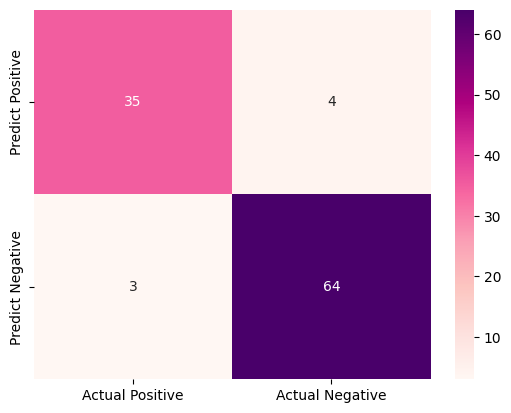

In [22]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu')

Построим ROC-AUC кривую:

In [23]:
fpr, tpr, _ = roc_curve(y_test.map({'g': 1, 'b': 0}).astype(int), convert_to_int(y_pred_auto), pos_label=1)
roc_auc = roc_auc_score(y_test.map({'g': 1, 'b': 0}).astype(int), convert_to_int(y_pred_auto))
print(f'Roc Auc coeff: {roc_auc}')

Roc Auc coeff: 0.9263298890164562


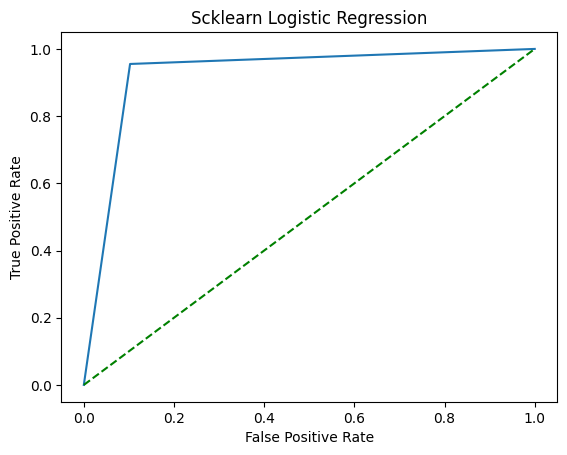

In [24]:
plt.plot(fpr, tpr)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'g--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Scklearn Logistic Regression')
plt.show()

### Вывод

**Автоматически модель** использовала алгоритм **грубой силы** с **количеством соседей равным 2 равным** и метрикой расстояния **Брея-Кертиса**. Её точность на тестовых данных составила ***0.9339622641509434*** и **1** на обучающей выборке, что может свидетельствовать о незначительном переобучении алгоритма.

## Brute-Force

Используется алгоритм **грубой силы** для поиска соседей (*классический kNN*).

Построим модель с дефолтными параметрами.

In [25]:
# Объявляем модель
knn = KNeighborsClassifier(algorithm='brute')
# Обучаем
knn.fit(X_train, y_train)
# Прогнозируем
y_pred = knn.predict(X_test)

Посчитаем для нее точность:

In [26]:
print(accuracy_score(y_test, y_pred))

0.8584905660377359


Настроим сетку для поиска наилучших параметров для модели с **количеством соседей** от 1 до 30 и разными метриками расстояния.

In [27]:
parameters = {
    'n_neighbors': range(1, 31, 1),
    'metric': ['minkowski', 'sqeuclidean', 'seuclidean', 'mahalanobis',
               'jensenshannon', 'euclidean', 'cosine', 'correlation',
               'cityblock', 'chebyshev', 'canberra', 'braycurtis']
              }

Найдем самые оптимальные параметры модели:

In [28]:
# Объявляем модель
knn = KNeighborsClassifier(algorithm='brute')
# Объявляем сетку для поиска наилучших параметров
clf = GridSearchCV(knn, parameters)
# Обучаем модель
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'metric': ['minkowski', 'sqeuclidean', 'seuclidean',
                                    'mahalanobis', 'jensenshannon', 'euclidean',
                                    'cosine', 'correlation', 'cityblock',
                                    'chebyshev', 'canberra', 'braycurtis'],
                         'n_neighbors': range(1, 31)})

Выведем лучшие параметры:

In [29]:
print(clf.best_estimator_)

KNeighborsClassifier(algorithm='brute', metric='braycurtis', n_neighbors=2)


Обучим модель на основе лучших параметров:

In [30]:
# Объявляем модель
knn_brute = KNeighborsClassifier(algorithm='brute', metric='braycurtis', n_neighbors=2)
# Объявляем сетку для поиска наилучших параметров
knn_brute.fit(X_train, y_train)
# Прогнозируем
y_pred_brute = knn_brute.predict(X_test)

Выведем меру точности для обучающих данных:

In [31]:
accuracy_brute_train = accuracy_score(y_train, knn_brute.predict(X_train))
accuracy_brute_train

1.0

Выведем меру точности:

In [32]:
accuracy_brute = accuracy_score(y_test, y_pred_brute)
accuracy_brute

0.9339622641509434

Выведем значения полноты, точности и ф-меры:

In [33]:
print(classification_report(y_test, y_pred_brute))

              precision    recall  f1-score   support

           b       0.92      0.90      0.91        39
           g       0.94      0.96      0.95        67

    accuracy                           0.93       106
   macro avg       0.93      0.93      0.93       106
weighted avg       0.93      0.93      0.93       106



Выведем разницу с дефолтной моделью:

In [34]:
print(accuracy_score(y_test, y_pred_brute) - accuracy_score(y_test, y_pred))

0.07547169811320753


Построим матрицу спутанности для алгоритма грубой силы:

In [35]:
cm = confusion_matrix(y_test, y_pred_brute)

print('Матрица путанности:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Матрица путанности:
 [[35  4]
 [ 3 64]]

True Positives(TP) =  35
True Negatives(TN) =  64
False Positives(FP) =  4
False Negatives(FN) =  3


<Axes: >

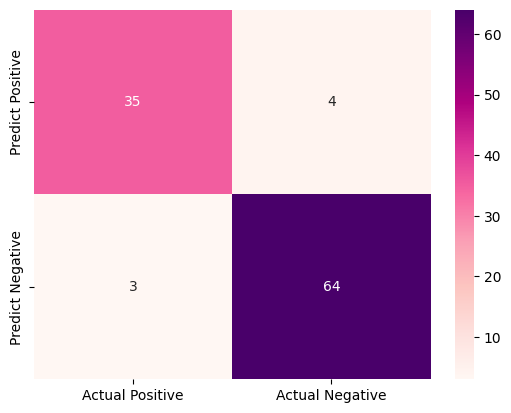

In [36]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu')

Построим ROC-AUC кривую:

In [37]:
fpr, tpr, _ = roc_curve(y_test.map({'g': 1, 'b': 0}).astype(int), convert_to_int(y_pred_brute), pos_label=1)
roc_auc = roc_auc_score(y_test.map({'g': 1, 'b': 0}).astype(int), convert_to_int(y_pred_brute))
print(f'Roc Auc coeff: {roc_auc}')

Roc Auc coeff: 0.9263298890164562


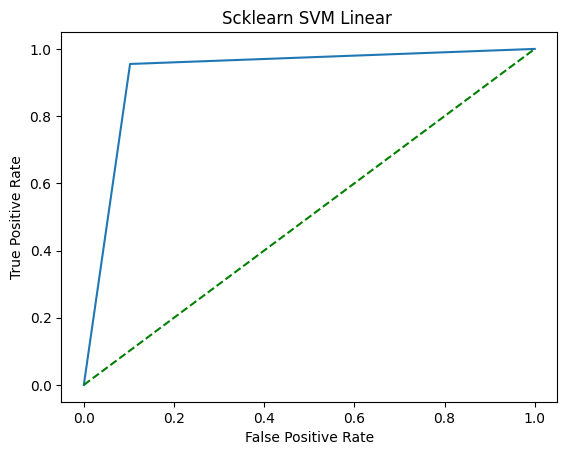

In [38]:
plt.plot(fpr, tpr)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'g--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Scklearn SVM Linear ')
plt.show()

### Вывод

Лучшие параметры для алгоритма **грубой силы** - это **количество соседей равное 2** и метрика расстояния **Брея-Кертиса**, что подтверждает гипотезу того, что алгоритм автоматического поиска использовал данный алгоритм при построении модели. Её точность на тестовых данных составила ***0.9339622641509434*** и **1** на обучающей выборке, что может свидетельствовать о незначительном переобучении алгоритма.

## KDTree

**Дерево kd** - это древовидная структура, которая хранит точки экземпляра в n-мерном пространстве для быстрого поиска. Дерево kd - это двоичное дерево. Построение дерева kd эквивалентно непрерывному делению n-мерного пространства с гиперплоскостью, перпендикулярной оси координат, для формирования серии n-мерных областей суперматрицы.

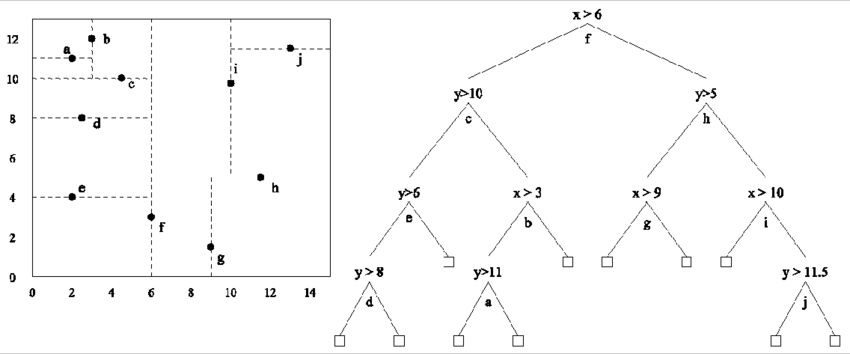

Построим модель с дефолтными параметрами.

In [39]:
# Объявляем модель
knn = KNeighborsClassifier(algorithm='kd_tree')
# Обучаем
knn.fit(X_train, y_train)
# Прогнозируем
y_pred = knn.predict(X_test)

Посчитаем для нее точность:

In [40]:
print(accuracy_score(y_test, y_pred))

0.8584905660377359


Настроим сетку для поиска наилучших параметров, где добавился параметр **размер листа** у дерева, так как он может повлиять на скорость построения и запроса, а также на объем памяти, необходимый для хранения дерева. И поменялся **набор метрик расстояния** в соответствии с набором метрик для kd-дерева в sklearn:

In [41]:
parameters = {
    'n_neighbors': range(1, 21),
    'leaf_size': range(1, 41),
    'metric': ['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']
    }

Найдем самые оптимальные параметры модели:

In [42]:
# Объявляем модель
knn = KNeighborsClassifier(algorithm='kd_tree')
# Объявляем сетку для поиска наилучших параметров
clf = GridSearchCV(knn, parameters)
# Обучаем модель
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='kd_tree'),
             param_grid={'leaf_size': range(1, 41),
                         'metric': ['euclidean', 'l2', 'minkowski', 'p',
                                    'manhattan', 'cityblock', 'l1', 'chebyshev',
                                    'infinity'],
                         'n_neighbors': range(1, 21)})

Выведем лучшие параметры:

In [43]:
print(clf.best_estimator_)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='manhattan',
                     n_neighbors=2)


Обучим модель на основе лучших параметров:

In [44]:
# Объявляем модель
knn_kd_tree = KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='manhattan',
                     n_neighbors=2)
# Объявляем сетку для поиска наилучших параметров
knn_kd_tree.fit(X_train, y_train)
# Прогнозируем
y_pred_kd_tree = knn_kd_tree.predict(X_test)

Выведем меру точности для обучающих данных:

In [45]:
accuracy_brute_train = accuracy_score(y_train, knn_kd_tree.predict(X_train))
accuracy_brute_train

0.9877551020408163

Выведем меру точности:

In [46]:
accuracy_kd_tree = accuracy_score(y_test, y_pred_kd_tree)
accuracy_kd_tree

0.9056603773584906

Выведем значения полноты, точности и ф-меры:

In [47]:
print(classification_report(y_test, y_pred_kd_tree))

              precision    recall  f1-score   support

           b       0.94      0.79      0.86        39
           g       0.89      0.97      0.93        67

    accuracy                           0.91       106
   macro avg       0.91      0.88      0.89       106
weighted avg       0.91      0.91      0.90       106



Выведем разницу с дефолтной моделью:

In [48]:
print(accuracy_score(y_test, y_pred_kd_tree) - accuracy_score(y_test, y_pred))

0.047169811320754707


Поиск параметров привел нас к базовой модели.

Построим матрицу спутанности для модели с **сигмоидным ядром**, параметром регуляризации **C = 1**:

In [49]:
cm = confusion_matrix(y_test, y_pred_kd_tree)

print('Матрица путанности:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Матрица путанности:
 [[31  8]
 [ 2 65]]

True Positives(TP) =  31
True Negatives(TN) =  65
False Positives(FP) =  8
False Negatives(FN) =  2


<Axes: >

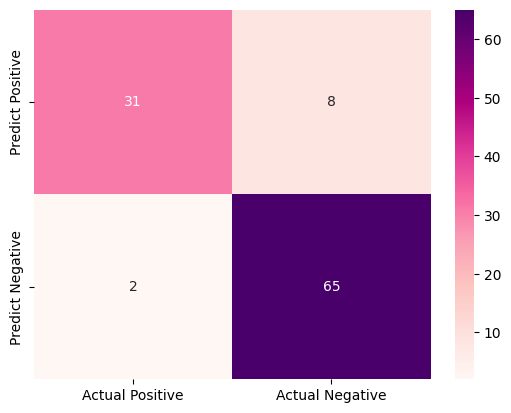

In [50]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu')

Построим ROC-AUC кривую:

In [51]:
fpr, tpr, _ = roc_curve(y_test.map({'g': 1, 'b': 0}).astype(int), convert_to_int(y_pred_kd_tree), pos_label=1)
roc_auc = roc_auc_score(y_test.map({'g': 1, 'b': 0}).astype(int), convert_to_int(y_pred_kd_tree))
print(f'Roc Auc coeff: {roc_auc}')

Roc Auc coeff: 0.8825105243015691


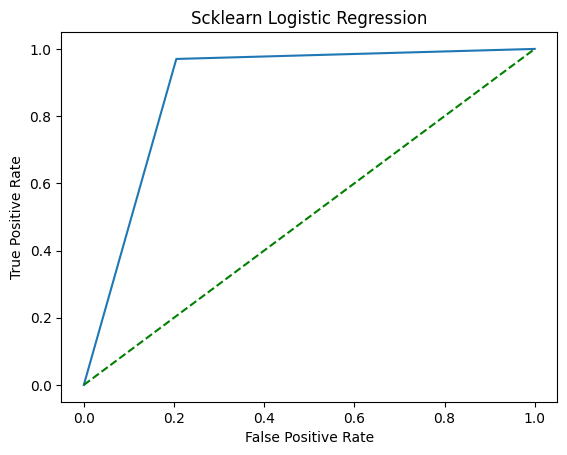

In [52]:
plt.plot(fpr, tpr)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'g--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Scklearn Logistic Regression')
plt.show()

### Вывод

Лучшие параметры для алгоритма **kd-дерева** - это **количеством соседей равное 2** и метрика расстояния **Манхэттена** или расстояние городских кварталов и **размер листа равный 1**. Её точность на тестовых данных составила ***0.9056603773584906*** и **0.9877551020408163** на обучающей выборке, что может свидетельствовать о незначительном переобучении алгоритма.

## BallTree

**Шарообразное дерево** - это бинарное дерево, в котором каждый узел определяет D-мерный шар, содержащий подмножество точек, подлежащих поиску. Каждый внутренний узел дерева разбивает точки данных на два непересекающихся набора, которые связаны с разными шарами. Хотя сами шары могут пересекаться, каждая точка присваивается тому или иному шару в разбиении в соответствии с его расстоянием от центра шара. Каждый конечный узел в дереве определяет шар и перечисляет все точки данных внутри этого шара.

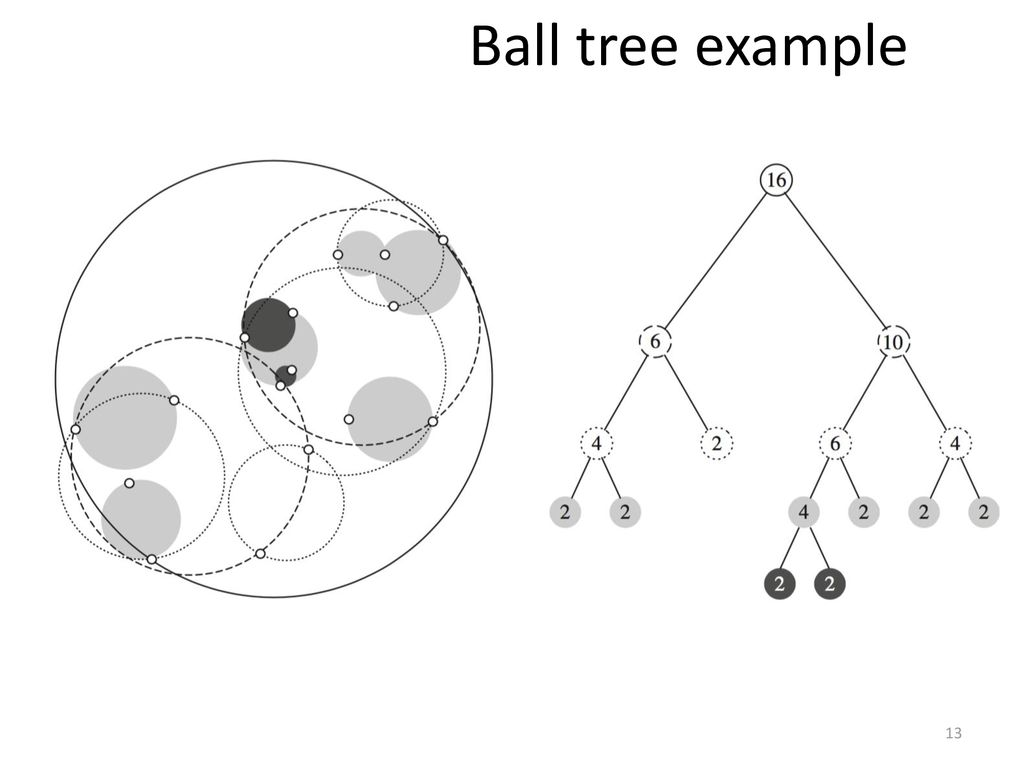

Построим модель с дефолтными параметрами.

In [53]:
# Объявляем модель
knn = KNeighborsClassifier(algorithm='ball_tree')
# Обучаем
knn.fit(X_train, y_train)
# Прогнозируем
y_pred = knn.predict(X_test)

Посчитаем для нее точность:

In [54]:
print(accuracy_score(y_test, y_pred))

0.8584905660377359


Настроим сетку для поиска наилучших параметров с параметрами **количество листов** у дерева и отличным набором метрик в соответствии с расстояниями для ball-дерева в scklearn:

In [55]:
parameters = {
    'n_neighbors': range(1, 21),
    'leaf_size': range(1, 41),
    'metric': ['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 
               'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'hamming', 'canberra', 
               'braycurtis', 'jaccard', 'dice', 'rogerstanimoto', 'russellrao', 'sokalmichener', 
               'sokalsneath', 'haversine', 'pyfunc']
    }

Найдем самые оптимальные параметры модели:

In [56]:
# Объявляем модель
knn = KNeighborsClassifier(algorithm='ball_tree')
# Объявляем сетку для поиска наилучших параметров
clf = GridSearchCV(knn, parameters)
# Обучаем модель
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='ball_tree'),
             param_grid={'leaf_size': range(1, 41),
                         'metric': ['euclidean', 'l2', 'minkowski', 'p',
                                    'manhattan', 'cityblock', 'l1', 'chebyshev',
                                    'infinity', 'seuclidean', 'mahalanobis',
                                    'hamming', 'canberra', 'braycurtis',
                                    'jaccard', 'dice', 'rogerstanimoto',
                                    'russellrao', 'sokalmichener',
                                    'sokalsneath', 'haversine', 'pyfunc'],
                         'n_neighbors': range(1, 21)})

Выведем лучшие параметры:

In [57]:
print(clf.best_estimator_)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='braycurtis',
                     n_neighbors=2)


Обучим модель на основе лучших параметров:

In [58]:
# Объявляем модель
knn_ball_tree = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='braycurtis',
                     n_neighbors=2)
# Объявляем сетку для поиска наилучших параметров
knn_ball_tree.fit(X_train, y_train)
# Прогнозируем
y_pred_ball_tree = knn_ball_tree.predict(X_test)

Выведем меру точности для обучающих данных:

In [59]:
accuracy_ball_tree = accuracy_score(y_train, knn_ball_tree.predict(X_train))
accuracy_ball_tree

1.0

Выведем меру точности:

In [60]:
accuracy_ball_tree = accuracy_score(y_test, y_pred_ball_tree)
accuracy_ball_tree

0.9339622641509434

Выведем значения полноты, точности и ф-меры:

In [61]:
print(classification_report(y_test, y_pred_ball_tree))

              precision    recall  f1-score   support

           b       0.92      0.90      0.91        39
           g       0.94      0.96      0.95        67

    accuracy                           0.93       106
   macro avg       0.93      0.93      0.93       106
weighted avg       0.93      0.93      0.93       106



Выведем разницу с дефолтной моделью:

In [62]:
print(accuracy_score(y_test, y_pred_ball_tree) - accuracy_score(y_test, y_pred))

0.07547169811320753


Построим матрицу спутанности для модели с **гауссовым ядром**, параметром регуляризации **C = 1** и **гаммой** равной 0.2:

In [63]:
cm = confusion_matrix(y_test, y_pred_ball_tree)

print('Матрица путанности:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Матрица путанности:
 [[35  4]
 [ 3 64]]

True Positives(TP) =  35
True Negatives(TN) =  64
False Positives(FP) =  4
False Negatives(FN) =  3


<Axes: >

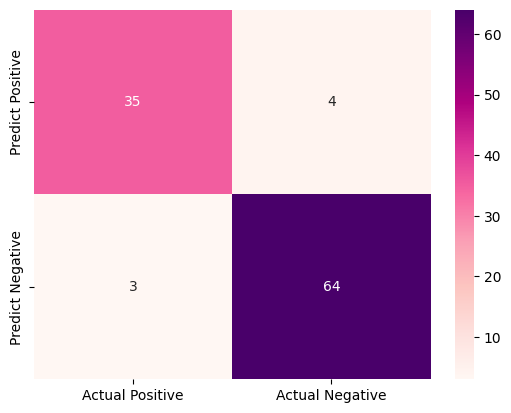

In [64]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu')

Построим ROC-AUC кривую:

In [65]:
fpr, tpr, _ = roc_curve(y_test.map({'g': 1, 'b': 0}).astype(int), convert_to_int(y_pred_ball_tree), pos_label=1)
roc_auc = roc_auc_score(y_test.map({'g': 1, 'b': 0}).astype(int), convert_to_int(y_pred_ball_tree))
print(f'Roc Auc coeff: {roc_auc}')

Roc Auc coeff: 0.9263298890164562


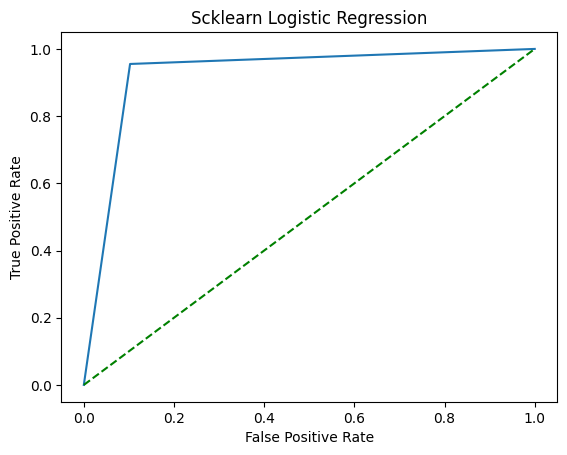

In [66]:
plt.plot(fpr, tpr)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'g--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Scklearn Logistic Regression')
plt.show()

### Вывод

Лучшие параметры для алгоритма **ball-дерева** - это **количеством соседей равное 2**, метрика расстояния **Брея-Кертиса** и **количество листов равное 1**. Её точность на тестовых данных составила ***0.9339622641509434*** и **1** на обучающей выборке, что может свидетельствовать о незначительном переобучении алгоритма.

## Сравним метрики расстояния

Настроим алгоритм, который будет сохранять лучшие результаты для каждого расстояния:

In [67]:
distance_best = {}

In [68]:
distances = ['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 
               'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'hamming', 'canberra', 
               'braycurtis', 'jaccard', 'dice', 'rogerstanimoto', 'russellrao', 'sokalmichener', 
               'sokalsneath', 'haversine', 'pyfunc']

In [69]:
parameters = {
    'n_neighbors': range(1, 21)
    }

In [70]:
# Итерируемся по всем метрикам
for metric in distances:
    parameters['metric'] = [metric]
    # Объявляем модель
    knn = KNeighborsClassifier(algorithm='auto')
    # Объявляем сетку для поиска наилучших параметров
    clf = GridSearchCV(knn, parameters)
    # Обучаем модель
    clf.fit(X_train, y_train)
    # Сохраняем результаты
    distance_best[metric] = clf.best_estimator_.get_params()

Выведем найденные параметры для каждой меры расстояния:

In [71]:
for k, v in distance_best.items():
    print(f'dist: {k}\tn_neighbors: {v['n_neighbors']}')

dist: euclidean	n_neighbors: 2
dist: l2	n_neighbors: 2
dist: minkowski	n_neighbors: 2
dist: p	n_neighbors: 2
dist: manhattan	n_neighbors: 2
dist: cityblock	n_neighbors: 2
dist: l1	n_neighbors: 2
dist: chebyshev	n_neighbors: 1
dist: infinity	n_neighbors: 1
dist: seuclidean	n_neighbors: 1
dist: mahalanobis	n_neighbors: 1
dist: hamming	n_neighbors: 19
dist: canberra	n_neighbors: 2
dist: braycurtis	n_neighbors: 2
dist: jaccard	n_neighbors: 4
dist: dice	n_neighbors: 4
dist: rogerstanimoto	n_neighbors: 3
dist: russellrao	n_neighbors: 1
dist: sokalmichener	n_neighbors: 3
dist: sokalsneath	n_neighbors: 4
dist: haversine	n_neighbors: 1
dist: pyfunc	n_neighbors: 1


Построим графики для данных метрик:

In [72]:
distance_accuracy = {}

In [73]:
# Итерируемся по всем метрикам
for k, v in distance_best.items():
    try:
        # Объявляем модель
        knn = KNeighborsClassifier(algorithm='auto', metric=k, n_neighbors=v['n_neighbors'])
        # Обучаем модель
        knn.fit(X_train, y_train)
        # Прогнозируем
        y_pred = knn.predict(X_test)
        # Сохраняем результаты точности на тестовых данных
        distance_accuracy[k] = accuracy_score(y_test, y_pred)
    except:
        continue

Text(0.5, 1.0, 'accuracy')

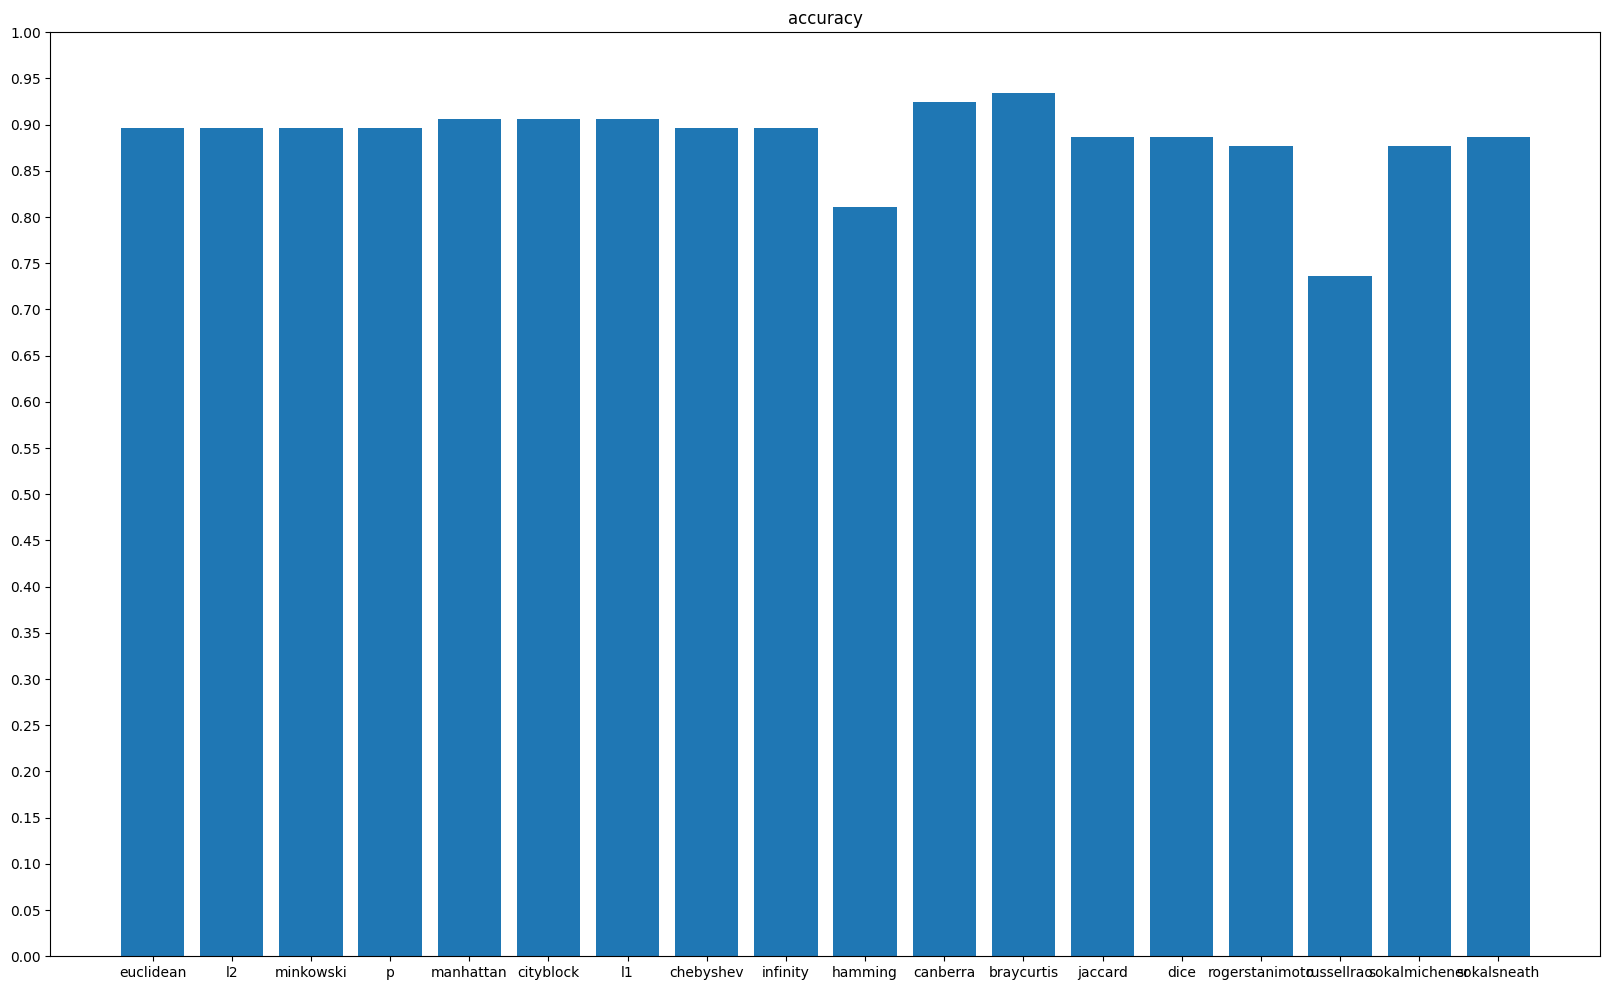

In [74]:
plt.figure(figsize = (20,12))
plt.bar(list(distance_accuracy.keys()), list(distance_accuracy.values()))
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('accuracy')

Выведем три самых хорших меры расстояний для данного датасета и алгоритма ближайших соседей с прямым перебором:

In [75]:
sorted(distance_accuracy.items(), key=lambda item: item[1], reverse=True)[:3]

[('braycurtis', 0.9339622641509434),
 ('canberra', 0.9245283018867925),
 ('manhattan', 0.9056603773584906)]

Расстояние Брайна-Кертиса:

$$d(x, y) = \frac{\sum_{i=1}^N {|x_i-y_i|}}{\sum_{i=1}^N {|x_i+y_i|}}$$

Расстояние Канберра:

$$d(x, y) = \sum_{i=1}^N \frac{|x_i - y_i|}{|x_i| + |y_i|}$$

Расстояние Манхэттена (городских кварталов):

$$d(x, y) = \sum_{i=1}^N |x_i - y_i|$$

# Вывод

Модели должны показывать одинаковую точность, так как древовидные алгоритмы должны просто ускорять работу, но не влиять на итоговый результат классификации, однако kd-дерево со своим специфичным набором метрик не смогла добиться результата других алгоритмов. Тем не менее, наиболее хорошо описывающим расстоянием оказалось **расстояние Брайна-Кертиса** с точностью **0.9339622641509434**, а **оптимальное количество соседей равно 2**.